# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


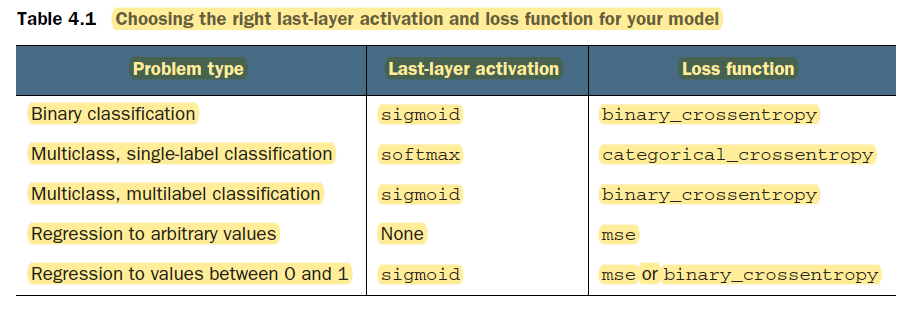

# Task::

## Identify fraudulent credit card transactions.

In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
credit_df = pd.read_csv('creditcard.csv')

In [3]:
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# check how many categories present in each Column
cat_list = []
count = 0
for col in credit_df.columns:
    if credit_df[col].dtype == 'O' and col != 'Class':
        print(len(credit_df[col].unique())," lablels in ",col)
        cat_list.append(col)
        count += len(credit_df[col].unique())

count

0

# Correlation

<AxesSubplot:>

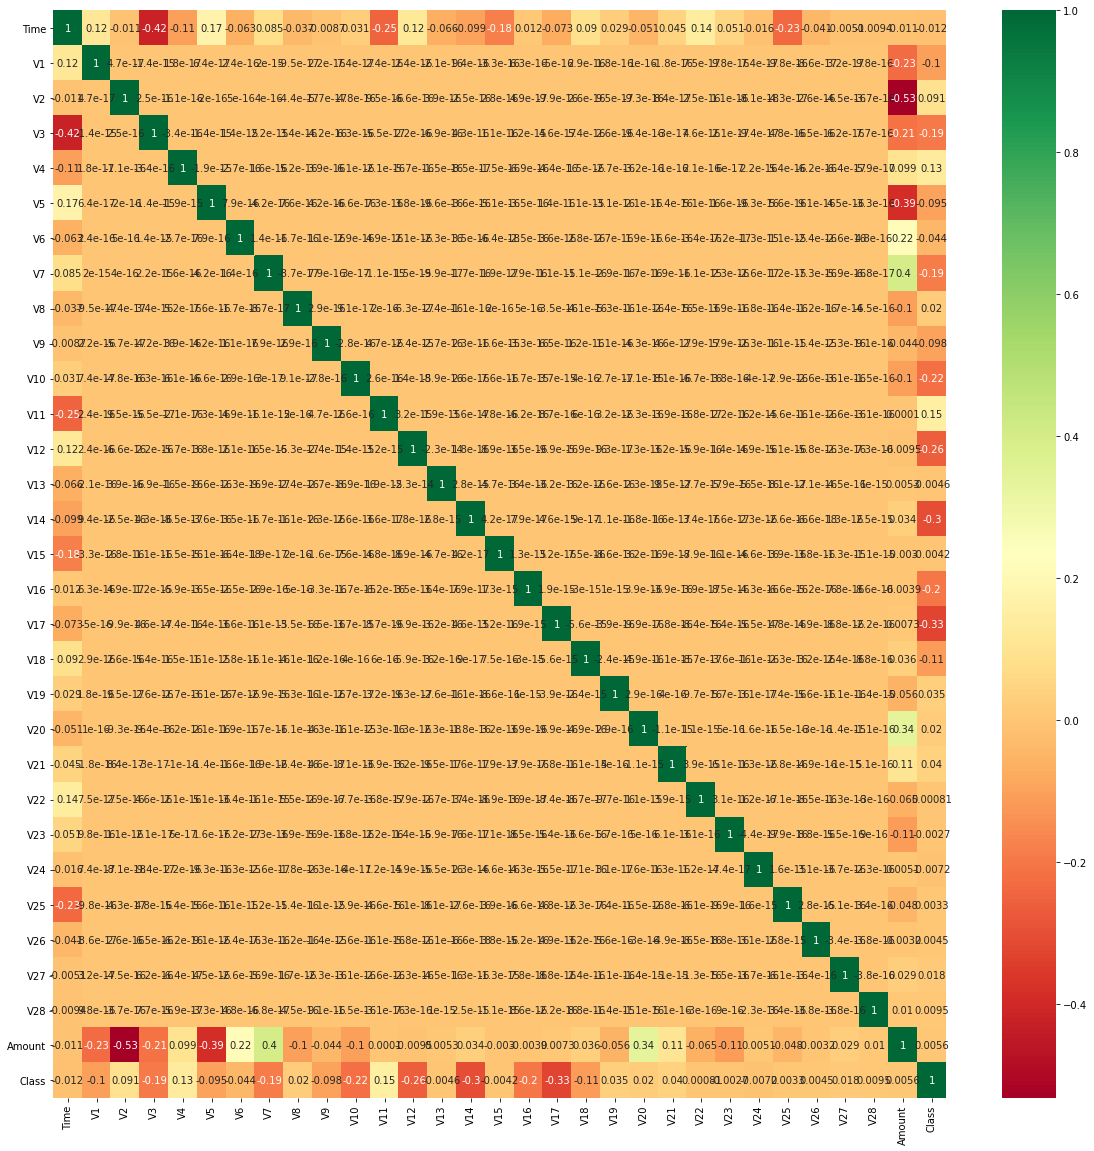

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(credit_df.corr(),annot=True,cmap="RdYlGn")

In [7]:
credit_df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

# Select Features with High Corelation

In [8]:
credit = credit_df[['V11','V4','V7','V3','V16','V10','V12','V14','V17','Class']]

In [9]:
credit.head()

,V11,V4,V7,V3,V16,V10,V12,V14,V17,Class
0,-0.551600,1.378155,0.239599,2.536347,-0.470401,0.090794,-0.617801,-0.311169,0.207971,0
1,1.612727,0.448154,-0.078803,0.166480,0.463917,-0.166974,1.065235,-0.143772,-0.114805,0
2,0.624501,0.379780,0.791461,1.773209,-2.890083,0.207643,0.066084,-0.165946,1.109969,0
3,-0.226487,-0.863291,0.237609,1.792993,-1.059647,-0.054952,0.178228,-0.287924,-0.684093,0
4,-0.822843,0.403034,0.592941,1.548718,-0.451449,0.753074,0.538196,-1.119670,-0.237033,0


array([[<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V7'}>],
       [<AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

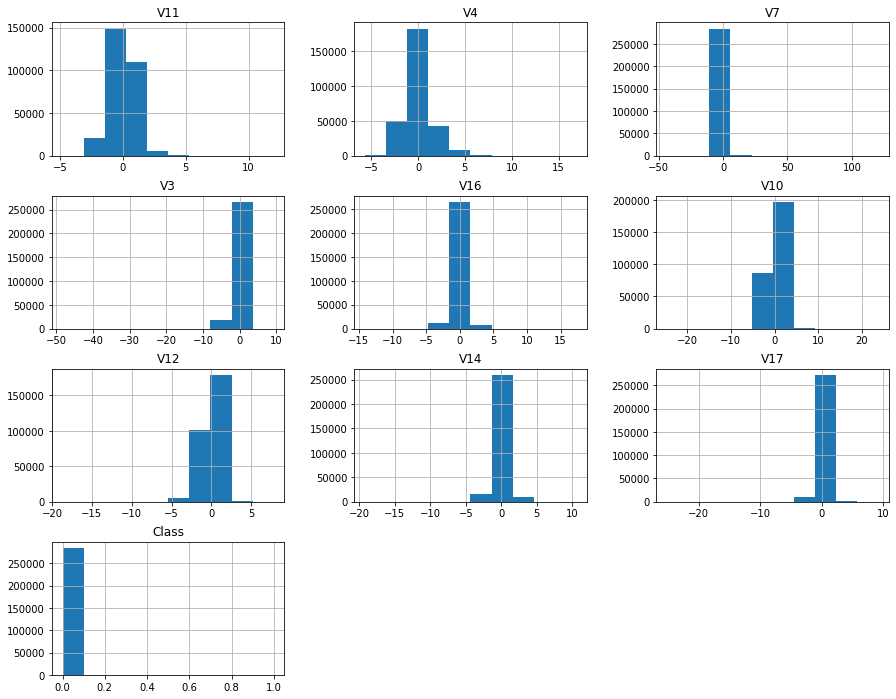

In [10]:
credit.hist(figsize=(15,12))

In [11]:
credit['Class'].unique()

array([0, 1], dtype=int64)

In [12]:
credit[credit['Class'] == 1].Class.count()

492

In [13]:
credit[credit['Class'] == 0].Class.count()

284315

# Cater Imbalanced Class column via UnderSampling

In [14]:
x = (credit.loc[:, credit.columns != 'Class'])
y = (credit.loc[:, credit.columns == 'Class'])

In [15]:
x.shape

(284807, 9)

In [16]:
from imblearn.under_sampling import RandomUnderSampler

In [17]:
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [18]:
x_under, y_under = undersample.fit_resample(x, y)

In [19]:
x_under.shape

(1476, 9)

Text(0.5, 1.0, 'After')

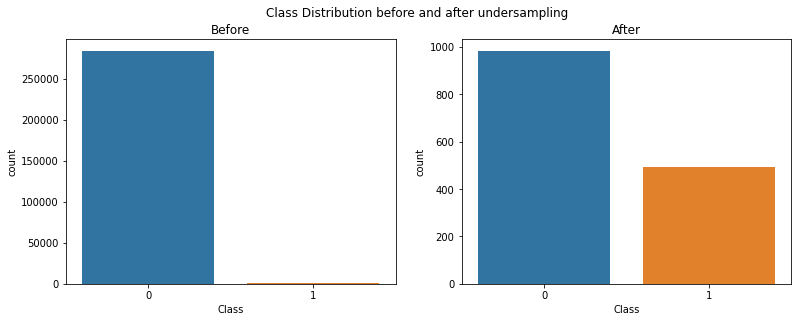

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=credit, ax=axs[0])
sns.countplot(x="Class", data=y_under, ax=axs[1])

fig.suptitle("Class Distribution before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

# Cater Imbalanced Class column via OverSampling

In [21]:
x = (credit.loc[:, credit.columns != 'Class'])
y = (credit.loc[:, credit.columns == 'Class'])

In [22]:
x.shape

(284807, 9)

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
oversample = RandomOverSampler(sampling_strategy=0.5)

In [25]:
x_over, y_over = oversample.fit_resample(x, y)

In [26]:
x_over.shape

(426472, 9)

Text(0.5, 1.0, 'After')

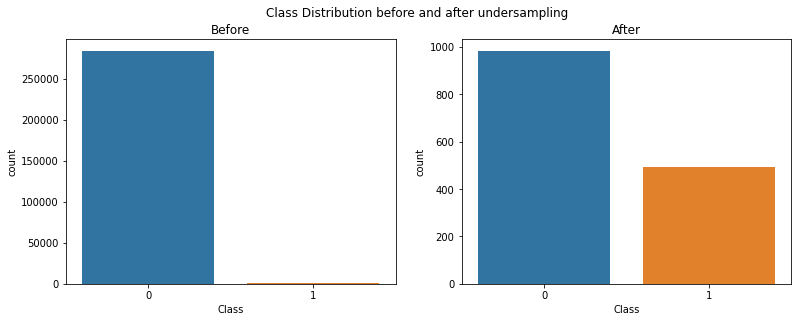

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=credit, ax=axs[0])
sns.countplot(x="Class", data=y_under, ax=axs[1])

fig.suptitle("Class Distribution before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

# Split Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Split to 70% Train and 30% Test
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.30, random_state=1)  # chnaged from 42

# Split 15% Test into further 30% Test and 15% Validation
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(1033, 9)
(221, 9)
(222, 9)


In [24]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(1033, 1)
(221, 1)
(222, 1)


# Scale Data

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
# Use MinMax Scaller to scale all features
min_max_scaler = MinMaxScaler()

In [27]:
x_train_s = min_max_scaler.fit_transform(x_train)
x_test_s = min_max_scaler.transform(x_test)
x_val_s = min_max_scaler.transform(x_val)

In [28]:
print(x_train_s.shape)
print(x_test_s.shape)
print(x_val_s.shape)

(1033, 9)
(221, 9)
(222, 9)


# Build & Train Model

In [37]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 10, activation='relu', input_dim=9))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [38]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [39]:
hist = model.fit(
    x_train_s, y_train, epochs = 500,
    validation_data = (x_val_s, y_val)
)

Epoch 1/500
33/33 [==============================] - 2s 19ms/step - loss: 0.6966 - accuracy: 0.4433 - val_loss: 0.6751 - val_accuracy: 0.7207
Epoch 2/500
33/33 [==============================] - 0s 6ms/step - loss: 0.6694 - accuracy: 0.7097 - val_loss: 0.6647 - val_accuracy: 0.6532
Epoch 3/500
33/33 [==============================] - 0s 5ms/step - loss: 0.6523 - accuracy: 0.7106 - val_loss: 0.6555 - val_accuracy: 0.6396
Epoch 4/500
33/33 [==============================] - 0s 5ms/step - loss: 0.6422 - accuracy: 0.6876 - val_loss: 0.6466 - val_accuracy: 0.6396
Epoch 5/500
33/33 [==============================] - 0s 5ms/step - loss: 0.6299 - accuracy: 0.6862 - val_loss: 0.6381 - val_accuracy: 0.6396
Epoch 6/500
33/33 [==============================] - 0s 5ms/step - loss: 0.6148 - accuracy: 0.6972 - val_loss: 0.6298 - val_accuracy: 0.6396
Epoch 7/500
33/33 [==============================] - 0s 6ms/step - loss: 0.6103 - accuracy: 0.6747 - val_loss: 0.6220 - val_accuracy: 0.6396
Epoch 8/500


Epoch 59/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1657 - accuracy: 0.9440 - val_loss: 0.1778 - val_accuracy: 0.9324
Epoch 60/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1793 - accuracy: 0.9416 - val_loss: 0.1832 - val_accuracy: 0.9279
Epoch 61/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1627 - accuracy: 0.9422 - val_loss: 0.1714 - val_accuracy: 0.9414
Epoch 62/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1793 - accuracy: 0.9371 - val_loss: 0.1779 - val_accuracy: 0.9279
Epoch 63/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1722 - accuracy: 0.9436 - val_loss: 0.1738 - val_accuracy: 0.9369
Epoch 64/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1850 - accuracy: 0.9373 - val_loss: 0.1733 - val_accuracy: 0.9369
Epoch 65/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1907 - accuracy: 0.9361 - val_loss: 0.1674 - val_accuracy: 0.9414
Epoch 

33/33 [==============================] - 0s 6ms/step - loss: 0.1266 - accuracy: 0.9560 - val_loss: 0.1341 - val_accuracy: 0.9550
Epoch 174/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1544 - accuracy: 0.9457 - val_loss: 0.1341 - val_accuracy: 0.9595
Epoch 175/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1388 - accuracy: 0.9479 - val_loss: 0.1341 - val_accuracy: 0.9595
Epoch 176/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1147 - accuracy: 0.9561 - val_loss: 0.1400 - val_accuracy: 0.9550
Epoch 177/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1417 - accuracy: 0.9505 - val_loss: 0.1387 - val_accuracy: 0.9640
Epoch 178/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1562 - accuracy: 0.9512 - val_loss: 0.1379 - val_accuracy: 0.9640
Epoch 179/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1431 - accuracy: 0.9522 - val_loss: 0.1408 - val_accuracy: 0.9550
Epoch 180/500

33/33 [==============================] - 0s 6ms/step - loss: 0.1253 - accuracy: 0.9613 - val_loss: 0.1289 - val_accuracy: 0.9640
Epoch 288/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1337 - accuracy: 0.9527 - val_loss: 0.1349 - val_accuracy: 0.9550
Epoch 289/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1561 - accuracy: 0.9455 - val_loss: 0.1277 - val_accuracy: 0.9640
Epoch 290/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1314 - accuracy: 0.9521 - val_loss: 0.1295 - val_accuracy: 0.9640
Epoch 291/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1351 - accuracy: 0.9522 - val_loss: 0.1396 - val_accuracy: 0.9595
Epoch 292/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1592 - accuracy: 0.9451 - val_loss: 0.1561 - val_accuracy: 0.9550
Epoch 293/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1072 - accuracy: 0.9627 - val_loss: 0.1394 - val_accuracy: 0.9550
Epoch 294/500

33/33 [==============================] - 0s 5ms/step - loss: 0.1271 - accuracy: 0.9567 - val_loss: 0.1265 - val_accuracy: 0.9640
Epoch 402/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1202 - accuracy: 0.9609 - val_loss: 0.1298 - val_accuracy: 0.9685
Epoch 403/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1192 - accuracy: 0.9590 - val_loss: 0.1305 - val_accuracy: 0.9685
Epoch 404/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1433 - accuracy: 0.9558 - val_loss: 0.1442 - val_accuracy: 0.9595
Epoch 405/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1053 - accuracy: 0.9680 - val_loss: 0.1540 - val_accuracy: 0.9550
Epoch 406/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1229 - accuracy: 0.9572 - val_loss: 0.1259 - val_accuracy: 0.9640
Epoch 407/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1182 - accuracy: 0.9629 - val_loss: 0.1891 - val_accuracy: 0.9459
Epoch 408/500

### Check Model's Accuracy and Loss against Validation Data

In [40]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

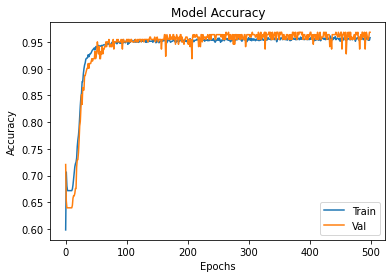

In [41]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

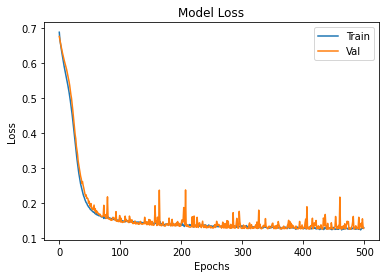

In [42]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (1) Retune Model (increase neurons)

In [43]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dense(units = 12, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [44]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [45]:
hist = model.fit(
    x_train_s, y_train, epochs = 500,
    validation_data = (x_val_s, y_val)
)

Epoch 1/500
33/33 [==============================] - 1s 9ms/step - loss: 0.6383 - accuracy: 0.7012 - val_loss: 0.6374 - val_accuracy: 0.6396
Epoch 2/500
33/33 [==============================] - 0s 6ms/step - loss: 0.6103 - accuracy: 0.6755 - val_loss: 0.6199 - val_accuracy: 0.6396
Epoch 3/500
33/33 [==============================] - 0s 5ms/step - loss: 0.5928 - accuracy: 0.6662 - val_loss: 0.6094 - val_accuracy: 0.6396
Epoch 4/500
33/33 [==============================] - 0s 5ms/step - loss: 0.5721 - accuracy: 0.6778 - val_loss: 0.6002 - val_accuracy: 0.6396
Epoch 5/500
33/33 [==============================] - 0s 5ms/step - loss: 0.5611 - accuracy: 0.6831 - val_loss: 0.5902 - val_accuracy: 0.6532
Epoch 6/500
33/33 [==============================] - 0s 5ms/step - loss: 0.5533 - accuracy: 0.6821 - val_loss: 0.5754 - val_accuracy: 0.6622
Epoch 7/500
33/33 [==============================] - 0s 5ms/step - loss: 0.5255 - accuracy: 0.7217 - val_loss: 0.5540 - val_accuracy: 0.6802
Epoch 8/500
3

Epoch 59/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1389 - accuracy: 0.9573 - val_loss: 0.1616 - val_accuracy: 0.9505
Epoch 60/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1525 - accuracy: 0.9516 - val_loss: 0.1818 - val_accuracy: 0.9414
Epoch 61/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1699 - accuracy: 0.9419 - val_loss: 0.1507 - val_accuracy: 0.9505
Epoch 62/500
33/33 [==============================] - 0s 7ms/step - loss: 0.1563 - accuracy: 0.9512 - val_loss: 0.1524 - val_accuracy: 0.9550
Epoch 63/500
33/33 [==============================] - 0s 7ms/step - loss: 0.1730 - accuracy: 0.9407 - val_loss: 0.1543 - val_accuracy: 0.9505
Epoch 64/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1499 - accuracy: 0.9533 - val_loss: 0.1498 - val_accuracy: 0.9550
Epoch 65/500
33/33 [==============================] - 0s 7ms/step - loss: 0.1803 - accuracy: 0.9394 - val_loss: 0.1610 - val_accuracy: 0.9505
Epoch 

33/33 [==============================] - 0s 5ms/step - loss: 0.1546 - accuracy: 0.9466 - val_loss: 0.1371 - val_accuracy: 0.9640
Epoch 174/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1420 - accuracy: 0.9498 - val_loss: 0.1640 - val_accuracy: 0.9550
Epoch 175/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1452 - accuracy: 0.9526 - val_loss: 0.1339 - val_accuracy: 0.9595
Epoch 176/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1425 - accuracy: 0.9540 - val_loss: 0.1389 - val_accuracy: 0.9505
Epoch 177/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1305 - accuracy: 0.9543 - val_loss: 0.1325 - val_accuracy: 0.9595
Epoch 178/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1602 - accuracy: 0.9388 - val_loss: 0.1341 - val_accuracy: 0.9550
Epoch 179/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1542 - accuracy: 0.9422 - val_loss: 0.1479 - val_accuracy: 0.9414
Epoch 180/500

33/33 [==============================] - 0s 5ms/step - loss: 0.1461 - accuracy: 0.9492 - val_loss: 0.1285 - val_accuracy: 0.9685
Epoch 288/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1242 - accuracy: 0.9606 - val_loss: 0.1297 - val_accuracy: 0.9685
Epoch 289/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1269 - accuracy: 0.9538 - val_loss: 0.1324 - val_accuracy: 0.9685
Epoch 290/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1410 - accuracy: 0.9538 - val_loss: 0.1304 - val_accuracy: 0.9685
Epoch 291/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1394 - accuracy: 0.9485 - val_loss: 0.1490 - val_accuracy: 0.9550
Epoch 292/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1274 - accuracy: 0.9577 - val_loss: 0.1433 - val_accuracy: 0.9640
Epoch 293/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1220 - accuracy: 0.9606 - val_loss: 0.1287 - val_accuracy: 0.9595
Epoch 294/500

33/33 [==============================] - 0s 6ms/step - loss: 0.1366 - accuracy: 0.9549 - val_loss: 0.1270 - val_accuracy: 0.9685
Epoch 402/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1275 - accuracy: 0.9593 - val_loss: 0.1251 - val_accuracy: 0.9640
Epoch 403/500
33/33 [==============================] - 0s 8ms/step - loss: 0.1137 - accuracy: 0.9622 - val_loss: 0.1253 - val_accuracy: 0.9640
Epoch 404/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1272 - accuracy: 0.9579 - val_loss: 0.1263 - val_accuracy: 0.9685
Epoch 405/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1223 - accuracy: 0.9597 - val_loss: 0.1251 - val_accuracy: 0.9640
Epoch 406/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1270 - accuracy: 0.9504 - val_loss: 0.1271 - val_accuracy: 0.9685
Epoch 407/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1381 - accuracy: 0.9564 - val_loss: 0.1269 - val_accuracy: 0.9685
Epoch 408/500

### Check Model's Accuracy and Loss against Validation Data

In [46]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

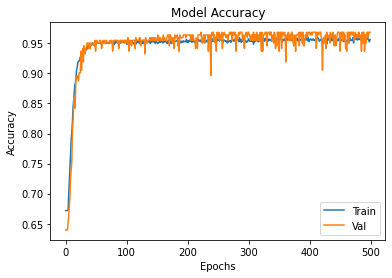

In [47]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

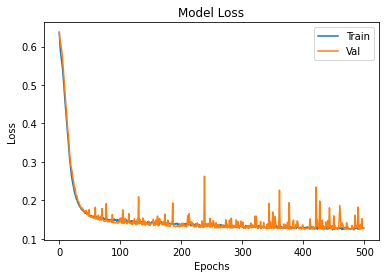

In [48]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (2) Retune Model (add dropout layers)

In [49]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dropout(0.5))
model.add(Dense(units = 12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [50]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [51]:
hist = model.fit(
    x_train_s, y_train, epochs = 500,
    validation_data = (x_val_s, y_val)
)

Epoch 1/500
33/33 [==============================] - 1s 9ms/step - loss: 0.7794 - accuracy: 0.4135 - val_loss: 0.6527 - val_accuracy: 0.6577
Epoch 2/500
33/33 [==============================] - 0s 6ms/step - loss: 0.7021 - accuracy: 0.5075 - val_loss: 0.6462 - val_accuracy: 0.6396
Epoch 3/500
33/33 [==============================] - 0s 6ms/step - loss: 0.6675 - accuracy: 0.5853 - val_loss: 0.6424 - val_accuracy: 0.6396
Epoch 4/500
33/33 [==============================] - 0s 6ms/step - loss: 0.6495 - accuracy: 0.6231 - val_loss: 0.6401 - val_accuracy: 0.6396
Epoch 5/500
33/33 [==============================] - 0s 6ms/step - loss: 0.6426 - accuracy: 0.6513 - val_loss: 0.6380 - val_accuracy: 0.6396
Epoch 6/500
33/33 [==============================] - 0s 6ms/step - loss: 0.6326 - accuracy: 0.6529 - val_loss: 0.6356 - val_accuracy: 0.6396
Epoch 7/500
33/33 [==============================] - 0s 6ms/step - loss: 0.6404 - accuracy: 0.6606 - val_loss: 0.6342 - val_accuracy: 0.6396
Epoch 8/500
3

Epoch 59/500
33/33 [==============================] - 0s 7ms/step - loss: 0.4038 - accuracy: 0.8540 - val_loss: 0.3359 - val_accuracy: 0.8919
Epoch 60/500
33/33 [==============================] - 0s 7ms/step - loss: 0.3945 - accuracy: 0.8398 - val_loss: 0.3190 - val_accuracy: 0.9009
Epoch 61/500
33/33 [==============================] - 0s 6ms/step - loss: 0.3983 - accuracy: 0.8519 - val_loss: 0.3146 - val_accuracy: 0.9009
Epoch 62/500
33/33 [==============================] - 0s 6ms/step - loss: 0.3725 - accuracy: 0.8561 - val_loss: 0.3020 - val_accuracy: 0.9099
Epoch 63/500
33/33 [==============================] - 0s 7ms/step - loss: 0.3781 - accuracy: 0.8548 - val_loss: 0.2970 - val_accuracy: 0.9099
Epoch 64/500
33/33 [==============================] - 0s 7ms/step - loss: 0.3850 - accuracy: 0.8512 - val_loss: 0.2906 - val_accuracy: 0.9054
Epoch 65/500
33/33 [==============================] - 0s 6ms/step - loss: 0.3710 - accuracy: 0.8561 - val_loss: 0.2821 - val_accuracy: 0.9369
Epoch 

33/33 [==============================] - 0s 8ms/step - loss: 0.2146 - accuracy: 0.9271 - val_loss: 0.1358 - val_accuracy: 0.9685
Epoch 174/500
33/33 [==============================] - 0s 7ms/step - loss: 0.2663 - accuracy: 0.8948 - val_loss: 0.1344 - val_accuracy: 0.9640
Epoch 175/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1868 - accuracy: 0.9339 - val_loss: 0.1350 - val_accuracy: 0.9685
Epoch 176/500
33/33 [==============================] - 0s 6ms/step - loss: 0.2224 - accuracy: 0.9264 - val_loss: 0.1446 - val_accuracy: 0.9640
Epoch 177/500
33/33 [==============================] - 0s 6ms/step - loss: 0.2120 - accuracy: 0.9152 - val_loss: 0.1367 - val_accuracy: 0.9685
Epoch 178/500
33/33 [==============================] - 0s 6ms/step - loss: 0.2112 - accuracy: 0.9277 - val_loss: 0.1365 - val_accuracy: 0.9640
Epoch 179/500
33/33 [==============================] - 0s 7ms/step - loss: 0.2223 - accuracy: 0.9083 - val_loss: 0.1372 - val_accuracy: 0.9640
Epoch 180/500

33/33 [==============================] - 0s 6ms/step - loss: 0.2059 - accuracy: 0.9268 - val_loss: 0.1321 - val_accuracy: 0.9685
Epoch 288/500
33/33 [==============================] - 0s 6ms/step - loss: 0.2086 - accuracy: 0.9037 - val_loss: 0.1349 - val_accuracy: 0.9640
Epoch 289/500
33/33 [==============================] - 0s 6ms/step - loss: 0.2177 - accuracy: 0.9148 - val_loss: 0.1400 - val_accuracy: 0.9640
Epoch 290/500
33/33 [==============================] - 0s 6ms/step - loss: 0.2196 - accuracy: 0.9193 - val_loss: 0.1391 - val_accuracy: 0.9640
Epoch 291/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1810 - accuracy: 0.9332 - val_loss: 0.1281 - val_accuracy: 0.9685
Epoch 292/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1863 - accuracy: 0.9266 - val_loss: 0.1317 - val_accuracy: 0.9595
Epoch 293/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1905 - accuracy: 0.9336 - val_loss: 0.1358 - val_accuracy: 0.9685
Epoch 294/500

33/33 [==============================] - 0s 7ms/step - loss: 0.1868 - accuracy: 0.9281 - val_loss: 0.1326 - val_accuracy: 0.9640
Epoch 402/500
33/33 [==============================] - 0s 7ms/step - loss: 0.2086 - accuracy: 0.9323 - val_loss: 0.1367 - val_accuracy: 0.9685
Epoch 403/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1876 - accuracy: 0.9253 - val_loss: 0.1286 - val_accuracy: 0.9685
Epoch 404/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1849 - accuracy: 0.9324 - val_loss: 0.1313 - val_accuracy: 0.9640
Epoch 405/500
33/33 [==============================] - 0s 6ms/step - loss: 0.2038 - accuracy: 0.9154 - val_loss: 0.1388 - val_accuracy: 0.9640
Epoch 406/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1751 - accuracy: 0.9344 - val_loss: 0.1297 - val_accuracy: 0.9685
Epoch 407/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1865 - accuracy: 0.9196 - val_loss: 0.1271 - val_accuracy: 0.9685
Epoch 408/500

### Check Model's Accuracy and Loss against Validation Data

In [52]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

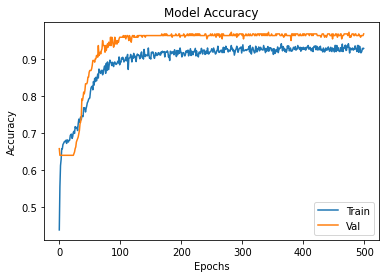

In [53]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

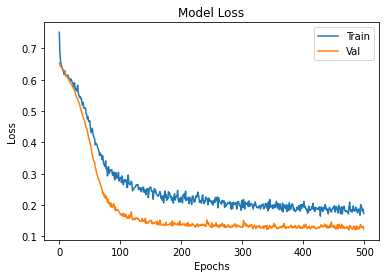

In [54]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (3) Retune Model (use adam optimizer)

In [55]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dense(units = 12, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [56]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [57]:
hist = model.fit(
    x_train_s, y_train, epochs = 500,
    validation_data = (x_val_s, y_val)
)

Epoch 1/500
33/33 [==============================] - 1s 9ms/step - loss: 0.6263 - accuracy: 0.6787 - val_loss: 0.5908 - val_accuracy: 0.6396
Epoch 2/500
33/33 [==============================] - 0s 6ms/step - loss: 0.5593 - accuracy: 0.6814 - val_loss: 0.5561 - val_accuracy: 0.6847
Epoch 3/500
33/33 [==============================] - 0s 6ms/step - loss: 0.5091 - accuracy: 0.7408 - val_loss: 0.5074 - val_accuracy: 0.7387
Epoch 4/500
33/33 [==============================] - 0s 6ms/step - loss: 0.4716 - accuracy: 0.7714 - val_loss: 0.4561 - val_accuracy: 0.7883
Epoch 5/500
33/33 [==============================] - 0s 6ms/step - loss: 0.4015 - accuracy: 0.8447 - val_loss: 0.3970 - val_accuracy: 0.8423
Epoch 6/500
33/33 [==============================] - 0s 6ms/step - loss: 0.3609 - accuracy: 0.8820 - val_loss: 0.3415 - val_accuracy: 0.8739
Epoch 7/500
33/33 [==============================] - 0s 9ms/step - loss: 0.3157 - accuracy: 0.9018 - val_loss: 0.2930 - val_accuracy: 0.8874
Epoch 8/500
3

Epoch 59/500
33/33 [==============================] - 0s 7ms/step - loss: 0.1661 - accuracy: 0.9452 - val_loss: 0.1325 - val_accuracy: 0.9640
Epoch 60/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1589 - accuracy: 0.9456 - val_loss: 0.1354 - val_accuracy: 0.9640
Epoch 61/500
33/33 [==============================] - 0s 7ms/step - loss: 0.1675 - accuracy: 0.9462 - val_loss: 0.1421 - val_accuracy: 0.9595
Epoch 62/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1782 - accuracy: 0.9402 - val_loss: 0.1397 - val_accuracy: 0.9595
Epoch 63/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1601 - accuracy: 0.9506 - val_loss: 0.1352 - val_accuracy: 0.9550
Epoch 64/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1490 - accuracy: 0.9570 - val_loss: 0.1320 - val_accuracy: 0.9640
Epoch 65/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1577 - accuracy: 0.9545 - val_loss: 0.1321 - val_accuracy: 0.9640
Epoch

33/33 [==============================] - 0s 6ms/step - loss: 0.1570 - accuracy: 0.9507 - val_loss: 0.1269 - val_accuracy: 0.9505
Epoch 174/500
33/33 [==============================] - 0s 5ms/step - loss: 0.1168 - accuracy: 0.9664 - val_loss: 0.1268 - val_accuracy: 0.9505
Epoch 175/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1231 - accuracy: 0.9608 - val_loss: 0.1261 - val_accuracy: 0.9685
Epoch 176/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1254 - accuracy: 0.9605 - val_loss: 0.1379 - val_accuracy: 0.9640
Epoch 177/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1732 - accuracy: 0.9467 - val_loss: 0.1264 - val_accuracy: 0.9595
Epoch 178/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1107 - accuracy: 0.9694 - val_loss: 0.1278 - val_accuracy: 0.9505
Epoch 179/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1543 - accuracy: 0.9532 - val_loss: 0.1266 - val_accuracy: 0.9685
Epoch 180/500

33/33 [==============================] - 0s 5ms/step - loss: 0.1250 - accuracy: 0.9619 - val_loss: 0.1260 - val_accuracy: 0.9550
Epoch 288/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1494 - accuracy: 0.9477 - val_loss: 0.1275 - val_accuracy: 0.9685
Epoch 289/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1252 - accuracy: 0.9526 - val_loss: 0.1277 - val_accuracy: 0.9685
Epoch 290/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1178 - accuracy: 0.9566 - val_loss: 0.1270 - val_accuracy: 0.9685
Epoch 291/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1324 - accuracy: 0.9543 - val_loss: 0.1315 - val_accuracy: 0.9685
Epoch 292/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1044 - accuracy: 0.9654 - val_loss: 0.1437 - val_accuracy: 0.9640
Epoch 293/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1413 - accuracy: 0.9569 - val_loss: 0.1305 - val_accuracy: 0.9685
Epoch 294/500

33/33 [==============================] - 0s 6ms/step - loss: 0.1272 - accuracy: 0.9578 - val_loss: 0.1272 - val_accuracy: 0.9685
Epoch 402/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1297 - accuracy: 0.9539 - val_loss: 0.1261 - val_accuracy: 0.9550
Epoch 403/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1402 - accuracy: 0.9516 - val_loss: 0.1357 - val_accuracy: 0.9685
Epoch 404/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1129 - accuracy: 0.9640 - val_loss: 0.1287 - val_accuracy: 0.9550
Epoch 405/500
33/33 [==============================] - 0s 6ms/step - loss: 0.1263 - accuracy: 0.9536 - val_loss: 0.1339 - val_accuracy: 0.9685
Epoch 406/500
33/33 [==============================] - 0s 7ms/step - loss: 0.1280 - accuracy: 0.9625 - val_loss: 0.1292 - val_accuracy: 0.9685
Epoch 407/500
33/33 [==============================] - 0s 7ms/step - loss: 0.1385 - accuracy: 0.9536 - val_loss: 0.1289 - val_accuracy: 0.9550
Epoch 408/500

### Check Model's Accuracy and Loss against Validation Data

In [58]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

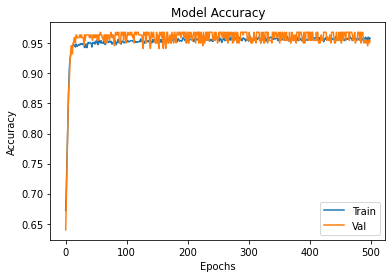

In [59]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

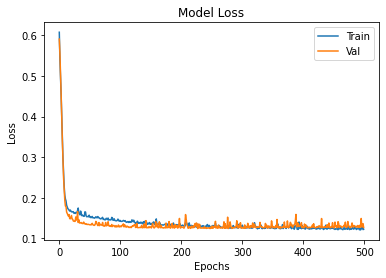

In [60]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (4) Final Model

In [29]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()  # Initialize ANN
# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model.add(Dense(units = 16, activation='relu', input_dim=9))
model.add(Dense(units = 12, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [30]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [31]:
hist = model.fit(
    x_train_s, y_train, epochs = 100,
    validation_data = (x_val_s, y_val)
)

Epoch 1/100
33/33 [==============================] - 1s 7ms/step - loss: 0.6228 - accuracy: 0.6718 - val_loss: 0.6120 - val_accuracy: 0.6396
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.6815 - val_loss: 0.5506 - val_accuracy: 0.6847
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.7957 - val_loss: 0.4506 - val_accuracy: 0.7928
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8451 - val_loss: 0.3739 - val_accuracy: 0.8468
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.8838 - val_loss: 0.2966 - val_accuracy: 0.8919
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.9129 - val_loss: 0.2384 - val_accuracy: 0.9279
Epoch 7/100
33/33 [==============================] - 0s 4ms/step - loss: 0.2217 - accuracy: 0.9351 - val_loss: 0.1980 - val_accuracy: 0.9550
Epoch 8/100
3

Epoch 59/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1444 - accuracy: 0.9487 - val_loss: 0.1359 - val_accuracy: 0.9640
Epoch 60/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1432 - accuracy: 0.9487 - val_loss: 0.1270 - val_accuracy: 0.9685
Epoch 61/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1416 - accuracy: 0.9487 - val_loss: 0.1246 - val_accuracy: 0.9640
Epoch 62/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1438 - accuracy: 0.9497 - val_loss: 0.1271 - val_accuracy: 0.9685
Epoch 63/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1501 - accuracy: 0.9477 - val_loss: 0.1234 - val_accuracy: 0.9595
Epoch 64/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1416 - accuracy: 0.9497 - val_loss: 0.1256 - val_accuracy: 0.9640
Epoch 65/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9487 - val_loss: 0.1358 - val_accuracy: 0.9640
Epoch 

### Check Model's Accuracy and Loss against Validation Data

In [64]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

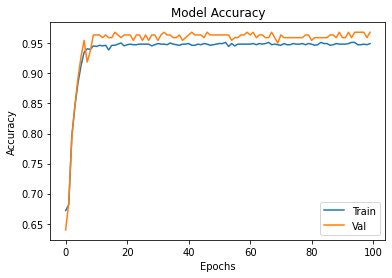

In [32]:
# Visuialize the Training and Valudation Accuracy to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

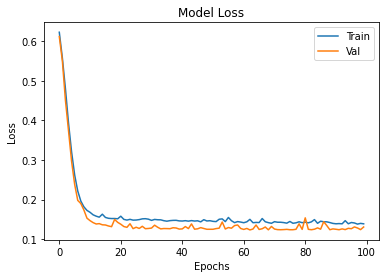

In [33]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# Evaluate Accuracy of Data based on Test Data

In [34]:
model.evaluate(x_test_s, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.9457


[0.1728466898202896, 0.9457013607025146]

In [35]:
# Model Accuracy is 94.5%

### Do Predictions on Test Data

In [69]:
predictions = model.predict(x_test_s)
prediction2 = np.where(predictions>= 0.87, 1,0 )

In [70]:
print(len(predictions))
print(len(x_test_s))

221
221
